# Rehabilitaion Program

##  1. Problem statement

###### There is a dataset of patients available those are treated for cardiology problem and for whom there is a kind rehabilitation program goes on. Since as due to different reasons many were unable to participate in the program. So a survey carried in which data of all patients were taken regarding reason for not joining the program, there gender, what is there age, whether they have car or not and what is the distance of  house/home of particular individual from the rehabilitation program centre.  Using this it is required to build a model using logistic regression method to predict whether new patient based upon his background  will join the program or not.

## Importing Libraries

In [89]:
# data analysis

import numpy as np
import pandas as pd
import sklearn as sk


#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning

%matplotlib notebook
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC, LinearSVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Acquire data


In [90]:
data = pd.read_csv('Data.csv', sep = ";", encoding = 'utf-16') #Reading csv files.

data.info()

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
Reason           156 non-null object
Gender           500 non-null object
Age              500 non-null object
Mobility         500 non-null object
Distance         500 non-null object
Participation    500 non-null int64
dtypes: int64(1), object(5)
memory usage: 23.5+ KB


,Reason,Gender,Age,Mobility,Distance,Participation
0,Hospital readmission,M,"61,3",No car,"68,7",0
1,Hospital readmission,M,"85,8",Car,"86,3",0
2,Hospital readmission,F,65,No car,"46,2",1
3,Hospital readmission,F,"72,5",No car,"39,7",0
4,Hospital readmission,M,93,No car,"73,3",0


###### Converting data into suitable data types

In [56]:
data['Age'] = data['Age'].str.replace(',', '.')
data['Distance'] = data['Distance'].str.replace(',', '.')
data['Age'] = pd.to_numeric(data['Age'])
data['Distance'] = pd.to_numeric(data['Distance'])

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
Reason           156 non-null object
Gender           500 non-null object
Age              500 non-null float64
Mobility         500 non-null object
Distance         500 non-null float64
Participation    500 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [58]:
print(data)

                   Reason Gender   Age Mobility  Distance  Participation
0    Hospital readmission      M  61.3   No car      68.7              0
1    Hospital readmission      M  85.8      Car      86.3              0
2    Hospital readmission      F  65.0   No car      46.2              1
3    Hospital readmission      F  72.5   No car      39.7              0
4    Hospital readmission      M  93.0   No car      73.3              0
5    Hospital readmission      F  52.0      Car      33.7              1
6    Hospital readmission      F  42.0      Car      25.7              1
7    Hospital readmission      M  57.0      Car      37.4              1
8    Hospital readmission      M  78.3   No car      66.1              0
9    Hospital readmission      F  78.0      Car      60.1              1
10   Hospital readmission      M  65.7   No car      68.5              0
11   Hospital readmission      F  51.0      Car      33.3              1
12   Hospital readmission      F  75.0      Car    

###### Since only 'Reason' is missing in half of the data set, so i'm filling it with 'No reason'.

In [59]:
data.Reason = data.Reason.fillna('No reason') #Filling missing values of reason

## 2. Descriptive analysis of the data and explanation what the data is about.



#### Features Available in dataset

In [60]:
print(data.columns.values)

['Reason' 'Gender' 'Age' 'Mobility' 'Distance' 'Participation']


As from the data it is clear that 5 features are available such as **Reason** for not joining the program, **Gender** of patient, **Age** of patient, means of **Mobility** for patient, **Distance** of rehabilitation centre from there living location. 

#### Numerical features: Age, Distance 

**Continuous**: Age, Distance



##### Categorical features: Reason, Gender, Mobiity     


##### Feature having blank values : Reason


##### Data types of features



In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
Reason           500 non-null object
Gender           500 non-null object
Age              500 non-null float64
Mobility         500 non-null object
Distance         500 non-null float64
Participation    500 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


######  No. of people who actually joined the program.

In [62]:
data.loc[data['Participation']== 1 , 'Participation'].sum()

220

In [63]:
data.describe(include=['O'])

,Reason,Gender,Mobility
count,500,500,500
unique,11,2,2
top,No reason,M,No car
freq,344,266,269


1. No. of males patients are more as compared to females.
2. There are 10 unique(excluding no reason) reasons given by patients regarding not joining the program/or having problemm to continue.
3. Almost half of patients don't have car.  

In [64]:
data[['Gender', 'Participation']].groupby(['Gender'], as_index=False).mean().sort_values(by='Participation', ascending=False)

,Gender,Participation
0,F,0.461538
1,M,0.421053


- No. of female patients who joined the program is more than the no. of male patients.

In [65]:
data[['Reason', 'Participation']].groupby(['Reason'], as_index=False).mean().sort_values(by='Reason', ascending=False)

,Reason,Participation
10,Resumed work,0.500000
9,Own facilities,0.307692
8,Other program,0.333333
7,Other obligations,0.500000
6,No reason,0.438953
5,Moved,0.142857
4,Medical reasons,0.421053
3,Lost interest,0.714286
2,Hospital readmission,0.500000
1,Forgot,0.166667


- People having own facility, or moved, forgot and disliked therapist are ones who mostly didn't participated in the program.

In [66]:
data[['Mobility', 'Participation']].groupby(['Mobility'], as_index=False).mean().sort_values(by='Mobility', ascending=False)

,Mobility,Participation
1,No car,0.275093
0,Car,0.632035


- People having car are most likely to participate in program.

<IPython.core.display.Javascript object>


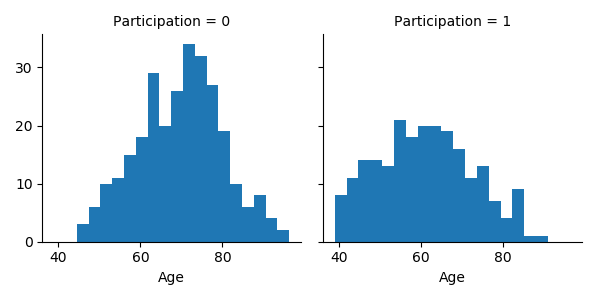

In [67]:
### Participation based on age
g = sns.FacetGrid(data, col='Participation')
g.map(plt.hist, 'Age', bins=18)

- **Most of people are in 50-80 age range. **
- **People mainly of age > 60 didn't participated in the program**
- **People mainly from age 40 to 60 participated in the program.**

<IPython.core.display.Javascript object>


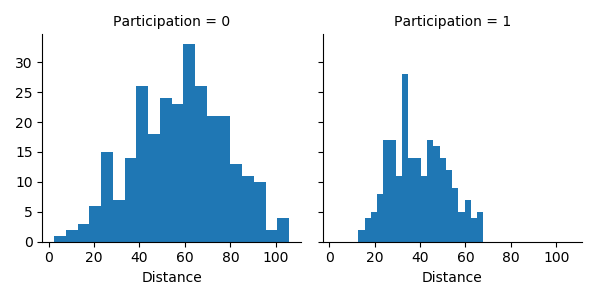

In [68]:
g = sns.FacetGrid(data, col='Participation')
g.map(plt.hist, 'Distance', bins= 20)

**Distance** from histrogram it clear that distance is a measure factor for people to join rehabitliaion programs as distance below 50 - 55km  are most likely to join. thus I will create a new band for it.

- **Most people who didn't participate the program were living at distance of 40 and above**

- **Most people to participate the program were living at distnce less than 60.**

## 3. Steps taken in order to perform the task and optimizing the model.

##### Add **Gender** and Mobility feature to model training and converting them to numeric values.

In [69]:
data['Gender'].replace(['F','M'],[0,1],inplace=True)
#data['Gender'].apply({'M':1, 'F':0}.get) #faster as compared to replace.
data['Mobility'].replace(['No car','Car'],[0,1],inplace=True)
data.head()

,Reason,Gender,Age,Mobility,Distance,Participation
0,Hospital readmission,1,61.3,0,68.7,0
1,Hospital readmission,1,85.8,1,86.3,0
2,Hospital readmission,0,65.0,0,46.2,1
3,Hospital readmission,0,72.5,0,39.7,0
4,Hospital readmission,1,93.0,0,73.3,0


###### Replacing reasons with numeric values and adding column reason values for model training.

In [70]:
data['Reason'].replace(['No reason','Hospital readmission','Other obligations','Resumed work','Medical reasons','Own facilities','Lost interest','Disliked therapist','Forgot','Moved','Other program'],[0,1,2,3,4,5,6,7,8,9,10],inplace=True)
data.head()

,Reason,Gender,Age,Mobility,Distance,Participation
0,1,1,61.3,0,68.7,0
1,1,1,85.8,1,86.3,0
2,1,0,65.0,0,46.2,1
3,1,0,72.5,0,39.7,0
4,1,1,93.0,0,73.3,0


In [71]:
print(data)

     Reason  Gender   Age  Mobility  Distance  Participation
0         1       1  61.3         0      68.7              0
1         1       1  85.8         1      86.3              0
2         1       0  65.0         0      46.2              1
3         1       0  72.5         0      39.7              0
4         1       1  93.0         0      73.3              0
5         1       0  52.0         1      33.7              1
6         1       0  42.0         1      25.7              1
7         1       1  57.0         1      37.4              1
8         1       1  78.3         0      66.1              0
9         1       0  78.0         1      60.1              1
10        1       1  65.7         0      68.5              0
11        1       0  51.0         1      33.3              1
12        1       0  75.0         1      55.5              1
13        1       0  60.0         1      38.9              1
14        1       1  62.4         0      63.1              0
15        1       0  80.

In [72]:
data.describe()

,Reason,Gender,Age,Mobility,Distance,Participation
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.090000,0.532000,65.915800,0.462000,49.906000,0.440000
std,2.128606,0.499475,11.758877,0.499053,19.549232,0.496884
min,0.000000,0.000000,39.000000,0.000000,2.500000,0.000000
25%,0.000000,0.000000,57.600000,0.000000,34.800000,0.000000
50%,0.000000,1.000000,66.000000,0.000000,48.000000,0.000000
75%,1.000000,1.000000,74.725000,1.000000,63.325000,1.000000
max,10.000000,1.000000,96.300000,1.000000,105.900000,1.000000


###### Nomalizing and scaling the data using Min, Max values

- **Scaling** : Reason, age and distance

In [73]:
#sklearn.preprocessing.scale(X)
#sklearn.preprocessing.normalize(X, axis=0)
#sklearn.preprocessing.MinMaxScaler().fit_transform(X)try other too.
#try also dfTest[['A','B']] = dfTest[['A','B']].apply(lambda x: MinMaxScaler().fit_transform(x))

scaler = MinMaxScaler()
data[['Reason','Age','Distance']] = scaler.fit_transform((data[['Reason','Age','Distance']]))

In [74]:
data.head()

,Reason,Gender,Age,Mobility,Distance,Participation
0,0.1,1,0.389180,0,0.640232,0
1,0.1,1,0.816754,1,0.810445,0
2,0.1,0,0.453752,0,0.422631,1
3,0.1,0,0.584642,0,0.359768,0
4,0.1,1,0.942408,0,0.684720,0


In [75]:
data.describe()

,Reason,Gender,Age,Mobility,Distance,Participation
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.109000,0.532000,0.469735,0.462000,0.458472,0.440000
std,0.212861,0.499475,0.205216,0.499053,0.189064,0.496884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.324607,0.000000,0.312379,0.000000
50%,0.000000,1.000000,0.471204,0.000000,0.440039,0.000000
75%,0.100000,1.000000,0.623473,1.000000,0.588250,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Distributing data     train: test: cross_validation = 60:20:20

In [76]:
import sklearn
from sklearn.utils import shuffle  
data = shuffle(data)              #Shuffling values of data

train_x, test_x = sklearn.cross_validation.train_test_split(data, train_size = 0.8, random_state = 1)

In [77]:
train_x, val_x = sklearn.cross_validation.train_test_split(train_x, train_size = 0.75, random_state = 1)

In [25]:
train_x.head()

,Reason,Gender,Age,Mobility,Distance,Participation
429,0.0,1,0.291449,0,0.376209,0
48,0.2,1,0.474695,1,0.588975,0
139,0.8,1,0.418848,0,0.394584,1
337,0.0,1,0.565445,0,0.415861,0
154,0.9,0,0.499127,0,0.297872,0


In [78]:
test_x.head()

,Reason,Gender,Age,Mobility,Distance,Participation
52,0.2,0,0.769634,1,0.715667,0
491,0.0,1,0.732984,0,0.509671,0
497,0.0,1,0.314136,0,0.338491,1
398,0.0,1,0.668412,0,0.375242,0
60,0.2,1,0.424084,0,0.390716,0


In [79]:
val_x.head()

,Reason,Gender,Age,Mobility,Distance,Participation
168,0.0,0,0.385689,0,0.475822,0
204,0.0,0,0.314136,1,0.207930,1
247,0.0,1,0.282723,1,0.646035,0
153,0.7,0,0.560209,1,0.804642,0
69,0.3,1,0.343805,0,0.681818,0


In [80]:
train_x.shape, test_x.shape, val_x.shape

((300, 6), (100, 6), (100, 6))

In [81]:
train_y = train_x['Participation']
train_y.shape

(300,)

In [82]:
test_y = test_x['Participation']
test_y.shape

(100,)

In [83]:
val_y = val_x['Participation']
val_y.shape

(100,)

### Using Logistic regression model to predict the values.

In [92]:
# clf = LogisticRegression.fit(train_x, train_y)
# from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(C = 100)
lr.fit(train_x, train_y)
pred_yv= lr.predict(val_x)
pred_yt= lr.predict(test_x)


# Calculating accuracy results

acc_log = round(lr.score(train_x, train_y) * 100, 2)
print("Accuracy of Logistic regression classifier on training set: ",acc_log)
test_log = round(lr.score(test_x, pred_yt) * 100, 2)
print("Accuracy of Logistic regression classifier on test set: ",test_log)
val_log = round(lr.score(val_x, pred_yv) * 100, 2)
print("Accuracy of Logistic regression classifier on cross validation set: ",val_log)

Accuracy of Logistic regression classifier on training set:  100.0
Accuracy of Logistic regression classifier on test set:  100.0
Accuracy of Logistic regression classifier on cross validation set:  100.0


## Applying Support Vector Machine Algorithm

The model generates a confidence score which is higher than Logistics Regression model.

In [98]:
# clf = LogisticRegression.fit(train_x, train_y)
# from sklearn.linear_model import LogisticRegression 
svc = SVC()
svc.fit(train_x, train_y)
pred_yv = svc.predict(val_x)
pred_yt = svc.predict(test_x)


# Calculating accuracy results

acc_log = round(svc.score(train_x, train_y) * 100, 2)
print("Accuracy of Support Vector Machine classifier on training set: ",acc_log)
test_log = round(svc.score(test_x, pred_yt) * 100, 2)
print("Accuracy of Support Vector Machine classifier on test set: ",test_log)
val_log = round(svc.score(val_x, pred_yv) * 100, 2)
print("Accuracy of Support Vector Machine classifier on cross validation set: ",val_log)

Accuracy of Support Vector Machine classifier on training set:  100.0
Accuracy of Support Vector Machine classifier on test set:  100.0
Accuracy of Support Vector Machine classifier on cross validation set:  100.0


## Applying K-Nearest Neighbors algorithm
KNN confidence score is better than Logistics Regression but worse than SVM.

In [103]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_x, train_y)
pred_yv = knn.predict(val_x)
pred_yt = knn.predict(test_x)

# Calculating accuracy results

acc_log = round(knn.score(train_x, train_y) * 100, 2)
print("Accuracy of Support Vector Machine classifier on training set: ",acc_log)
test_log = round(knn.score(test_x, pred_yt) * 100, 2)
print("Accuracy of Support Vector Machine classifier on test set: ",test_log)
val_log = round(knn.score(val_x, pred_yv) * 100, 2)
print("Accuracy of Support Vector Machine classifier on cross validation set: ",val_log)

Accuracy of Support Vector Machine classifier on training set:  100.0
Accuracy of Support Vector Machine classifier on test set:  100.0
Accuracy of Support Vector Machine classifier on cross validation set:  100.0


## Applying naive Bayes Classifier


In [106]:
gaussian = GaussianNB()
gaussian.fit(train_x, train_y)
pred_yv = gaussian.predict(val_x)
pred_yt = gaussian.predict(test_x)

# Calculating accuracy results

acc_gaussian = round(gaussian.score(train_x, train_y) * 100, 2)
print("Accuracy of Support Vector Machine classifier on training set: ",acc_gaussian)
test_gaussian = round(gaussian.score(test_x, pred_yt) * 100, 2)
print("Accuracy of Support Vector Machine classifier on test set: ",test_gaussian)
val_gaussian = round(gaussian.score(val_x, pred_yv) * 100, 2)
print("Accuracy of Support Vector Machine classifier on cross validation set: ",val_gaussian)

Accuracy of Support Vector Machine classifier on training set:  100.0
Accuracy of Support Vector Machine classifier on test set:  100.0
Accuracy of Support Vector Machine classifier on cross validation set:  100.0


## Applying Random Forest Algorithm


In [107]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(train_x, train_y)
pred_yv = random_forest.predict(val_x)
pred_yt = random_forest.predict(test_x)

# Calculating accuracy results

acc_random_forest = round(random_forest.score(train_x, train_y) * 100, 2)
print("Accuracy of Support Vector Machine classifier on training set: ",acc_random_forest)
test_random_forest = round(random_forest.score(test_x, pred_yt) * 100, 2)
print("Accuracy of Support Vector Machine classifier on test set: ",test_random_forest)
val_random_forest = round(random_forest.score(val_x, pred_yv) * 100, 2)
print("Accuracy of Support Vector Machine classifier on cross validation set: ",val_random_forest)

Accuracy of Support Vector Machine classifier on training set:  100.0
Accuracy of Support Vector Machine classifier on test set:  100.0
Accuracy of Support Vector Machine classifier on cross validation set:  100.0


Applying Decision tree

## 4. Interpretating the output

- From the results it is clear that the logistic regression classifier gives optimum for given data set.

## 5. Description of performance and efficiency.

Obtaining the performance scores for both test set and cross validation set.
1. F1 score
2. Precision score
3. Recall score

In [33]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
#Importing score methods

###### Performance scores for test set

In [34]:
from sklearn.metrics import precision_recall_fscore_support as score



precision, recall, fscore, support = score(test_y, pred_yt)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [ 1.  1.]
recall: [ 1.  1.]
fscore: [ 1.  1.]
support: [57 43]


###### Performance scores for cross validation set

In [35]:
precision, recall, fscore, support = score(val_y, pred_yv)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [ 1.  1.]
recall: [ 1.  1.]
fscore: [ 1.  1.]
support: [62 38]


###### Classification report of test set

In [36]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(test_y, pred_yt, target_names=['0', '1']))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        57
          1       1.00      1.00      1.00        43

avg / total       1.00      1.00      1.00       100



###### Classification report of cross validation set

In [37]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(val_y, pred_yv, target_names=['0', '1']))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        62
          1       1.00      1.00      1.00        38

avg / total       1.00      1.00      1.00       100



<IPython.core.display.Javascript object>


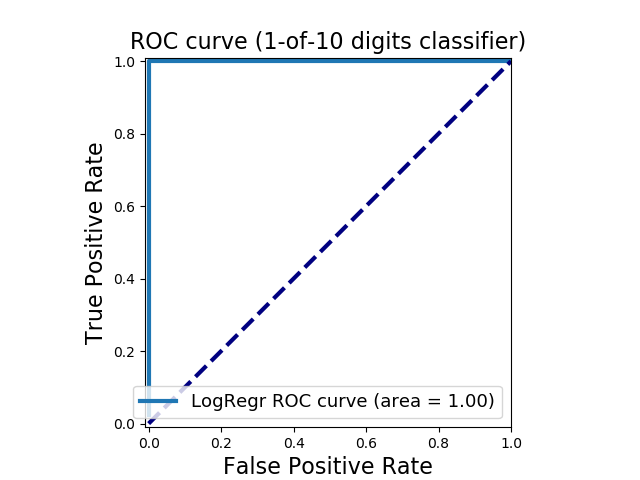

C:\Users\sudhi\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [38]:
from sklearn.metrics import roc_curve, auc

lr = LogisticRegression().fit(train_x, train_y)
y_score_lr = lr.fit(train_x, train_y).decision_function(test_x)
fpr_lr, tpr_lr, _ = roc_curve(test_y, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

Area under curve(AUC) have value 1 which confirms the performance of logistic regression algorithm for the given data is 100%.

## Conclusion

- My hypothesis was that logistic regression model will give train and test accuracy above 95% as patient data for rehabilition program clearly shows distinict differnce for the people of differnt age group those have particpated in program and those who didn't participate. Simultaneosly majority of people having car particpated in prgram those lived in medium range of distance from program centre, whereas people without car and living at far distances were the most who didn't participate. 
- Also the test set result and cross validation set results support my hypothesis and instead of 95% accurancy it shows 100% accuracy. Which is clear in its self based upon how the features Age, Distance, Mobility and few reason easily provide distinction to predict those who will participate in the program and those will not. The results are well support by F1 score, ROC Curve and Area Under Curve as their values are 1(not for ROC curve).